# 第7章 人の動きをアニメーションのようにシミュレーションしよう

ここでは、数値シミュレーションを学ぶうえで必要なプログラムを実行していく流れを学んでいきます。  

In [ ]:
#Colaboratory環境の設定
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MathProgramming/Chapter7

In [ ]:
#ライブラリの設定
!pip install -q -r ./requirements.txt

## 7-1 人の移動をシミュレーションしてみよう

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# パラメータ設定
dt = 1.0
dl = 1.0
num_time = 100
num_person = 10
x_size = 8.0
y_size = 6.0

# 初期化（初期値設定）
list_plot = []
x = np.zeros((num_time,num_person))
y = np.zeros((num_time,num_person))
for i in range(num_person):
    x[0,i] = np.random.rand()*x_size
    y[0,i] = np.random.rand()*y_size

# 時間発展方程式
fig = plt.figure()
for t in range(1,num_time):
    # 変量の計算
    dx = (np.random.rand(num_person)-0.5)*dl
    dy = (np.random.rand(num_person)-0.5)*dl
    # 拘束条件の設定
    for i in range(num_person):
        if ((x[t-1,i] + dx[i]*dt)>0)and((x[t-1,i] + dx[i]*dt)<x_size):
            x[t,i] = x[t-1,i] + dx[i]*dt
        else:
            x[t,i] = x[t-1,i]
        if ((y[t-1,i] + dy[i]*dt)>0)and((y[t-1,i] + dy[i]*dt)<y_size):
            y[t,i] = y[t-1,i] + dy[i]*dt
        else:
            y[t,i] = y[t-1,i]
    # 時刻ごとのグラフの描画
    img = plt.scatter(x[t],y[t],color="black")
    plt.xlim([0,x_size])
    plt.ylim([0,y_size])
    list_plot.append([img])
    
# グラフ（アニメーション）描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
anim

## 7-2 緊急時の避難行動をシミュレーションしてみよう

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# パラメータ設定
dt = 1.0
dl = 0.3
num_time = 100
num_person = 30
x_size = 8.0
y_size = 6.0
th_nearest = 0.2
th_exit = 0.5
x_exit = (x_size)/2
y_exit = 1/2

# 初期化（初期値設定）
list_plot = []
x = np.zeros((num_time,num_person))
y = np.zeros((num_time,num_person))
for i in range(num_person):
    x[0,i] = np.random.rand()*x_size/2
    y[0,i] = np.random.rand()*y_size
flag_area = np.zeros(num_person)
    
# 壁の生成
ywall = list(range(1,10))
xwall = [int(x_size/2)]*9

# 時間発展方程式
fig = plt.figure()
for t in range(1,num_time):
    # 変量の計算
    dx = np.zeros(num_person)
    dy = np.zeros(num_person)
    for i in range(num_person):
        if flag_area[i]==0:
            dx[i] = np.sign(x_exit - x[t-1,i])*dl
            dy[i] = np.sign(y_exit - y[t-1,i])*dl
        elif flag_area[i]==1:
            dx[i] = dl
            dy[i] = 0
        else:
            dx[i] = np.random.rand()*dl
            dy[i] = np.random.rand()*dl
    # 拘束条件の設定
    for i in range(num_person):
        flag_iter_x = 1
        flag_iter_y = 1
        # 移動領域に別のオブジェクトがいないかどうかを確認
        for j in range(num_person):
            if not i==j:
                dx_to_j = x[t-1,i] + dx[i] - x[t-1,j]
                dy_to_j = y[t-1,i] + dy[i] - y[t-1,j]
                if (np.sqrt(dx_to_j**2+dy_to_j**2)<th_nearest):
                    if (flag_area[i]==flag_area[j]):
                        flag_iter_x = 0
                        flag_iter_y = 0
                        break
        # 領域内かどうかを判定
        if ((x[t-1,i] + dx[i]*dt)>0)and((x[t-1,i] + dx[i]*dt)<x_size):
            if (flag_area[i]==0)and((x[t-1,i] + dx[i]*dt)>x_size/2):
                flag_iter_x = 0
            elif (flag_area[i]==2)and((x[t-1,i] + dx[i]*dt)<x_size/2):
                flag_iter_x = 0
        else:
            flag_iter_x = 0
        if ((y[t-1,i] + dy[i]*dt)<0)or((y[t-1,i] + dy[i]*dt)>y_size):
            flag_iter_y = 0
        # 更新
        if flag_iter_x==1:
            x[t,i] = x[t-1,i] + dx[i]*dt
        else:
            x[t,i] = x[t-1,i]
        if flag_iter_y==1:
            y[t,i] = y[t-1,i] + dy[i]*dt
        else:
            y[t,i] = y[t-1,i]
        # 出口に達したかどうかの確認
        dx_to_exit = x_exit - x[t,i]
        dy_to_exit = y_exit - y[t,i]
        if (np.sqrt(dx_to_exit**2+dy_to_exit**2)<th_exit):
            flag_area[i] = 1
        if (flag_area[i]==1)and(x[t,i]>(x_size/2)):
            flag_area[i] = 2
    # 時刻ごとのグラフの描画
    img = plt.scatter(x[t],y[t],color="black")
    plt.xlim([0,x_size])
    plt.ylim([0,y_size])
    plt.plot(xwall, ywall, 'b')
    list_plot.append([img])
    
# グラフ（アニメーション）描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
anim

## 7-3 それぞれの人の移動の様子を可視化してみよう

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

for i in range(num_person):
    plt.plot(x[:,i])
plt.show()

## 7-4 噂の広まりはシミュレーションできるの？

In [ ]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import time
import copy

# パラメータ設定
dt = 1
dx = 1
dy = 1
num_time = 100
N_x=100
N_y=100
D = 0.25

# 初期化（初期値設定）
list_plot = []
map = np.zeros((N_x,N_y))
for i_x in range(47,54):
    for i_y in range(47,54):
        map[i_x][i_y] = 1000
map_pre = copy.deepcopy(map)

# 時間発展方程式
fig = plt.figure()
for t in range(1,num_time):

    # 各格子における処理
    for i_x in range(N_x):
        for i_y in range(N_y):
            # 隣接する格子の座標を求める
            i_xL = i_x - dx
            if (i_xL<0):
                i_xL = i_x + dx
            i_xR = i_x + dx
            if (i_xR>=N_x):
                i_xR= i_x - dx
            i_yL = i_y - dy
            if (i_yL<0):
                i_yL = i_y + dy
            i_yR = i_y + dy
            if (i_yR>=N_y):
                i_yR= i_y - dy
            # 拡散方程式を解く（隣接する格子の状態から、次の状態を決定する）
            dm_x = (map_pre[i_xL][i_y]+map_pre[i_xR][i_y]-2*map_pre[i_x][i_y])/(dx**2)
            dm_y = (map_pre[i_x][i_yL]+map_pre[i_x][i_yR]-2*map_pre[i_x][i_y])/(dy**2)
            dm = D*(dm_x+dm_y)*dt
            map[i_x][i_y] += dm
            
    # 値の記録
    map_pre = copy.deepcopy(map)
    
    # 時刻ごとのグラフの描画
    plot_map = plt.imshow(map, vmin=0, vmax=10)
    list_plot.append([plot_map])

# グラフ（アニメーション）描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
anim

## 7-5 経路によって変わる噂や口コミの様子を確認してみよう

### 経路の読み込み

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# 経路データの読み込み
df_route = pd.read_csv("route.csv", header=None)
route = df_route.values

# 描画
plt.imshow(route)
plt.show()

### シミュレーション

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import time
import copy

# パラメータ設定
dt = 1
dx = 1
dy = 1
num_time = 100
N_x=route.shape[1]
N_y=route.shape[0]
D = 0.25

# 初期化（初期値設定）
list_plot = []
map = np.zeros((N_x,N_y))
for i_x in range(0,5):
    for i_y in range(0,5):
        map[i_x][i_y] = 1000
map = map*route
map_pre = copy.deepcopy(map)

# 時間発展方程式
fig = plt.figure()
for t in range(1,num_time):
    
    # 各格子における処理
    for i_x in range(N_x):
        for i_y in range(N_y):
            # 隣接する格子の座標を求める
            i_xL = i_x - dx
            if (i_xL<0):
                i_xL = i_x + dx
            i_xR = i_x + dx
            if (i_xR>=N_x):
                i_xR= i_x - dx
            i_yL = i_y - dy
            if (i_yL<0):
                i_yL = i_y + dy
            i_yR = i_y + dy
            if (i_yR>=N_y):
                i_yR= i_y - dy
            # 拡散方程式を解く（隣接する格子の状態から、次の状態を決定する）
            dm_x = (map_pre[i_xL][i_y]+map_pre[i_xR][i_y]-2*map_pre[i_x][i_y])/(dx**2)
            dm_y = (map_pre[i_x][i_yL]+map_pre[i_x][i_yR]-2*map_pre[i_x][i_y])/(dy**2)
            dm = D*(dm_x+dm_y)*dt
            map[i_x][i_y] += dm
            
    # 経路を考慮した値のリセット
    map = map*route

    # 値の記録
    map_pre = copy.deepcopy(map)
    
    # 時刻ごとのグラフの描画
    plot_map = plt.imshow(map, vmin=0, vmax=10)
    list_plot.append([plot_map])

# グラフ（アニメーション）描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
anim

## 7-6 どれだけ噂が広がったか、その浸透度合いをグラフにしてみよう

### 経路の読み込み

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# 経路データの読み込み
df_route = pd.read_csv("route.csv", header=None)
route = df_route.values

# 描画
plt.imshow(route)
plt.show()

### シミュレーション

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import time
import copy

# パラメータ設定
dt = 1
dx = 1
dy = 1
num_time = 100
N_x=route.shape[1]
N_y=route.shape[0]
D = 0.25

# 初期化（初期値設定）
list_plot = []
map = np.zeros((N_x,N_y))
for i_x in range(0,5):
    for i_y in range(0,5):
        map[i_x][i_y] = 1000
map = map*route
map_pre = copy.deepcopy(map)
list_percolate_rate = np.zeros(num_time)

# 時間発展方程式
fig = plt.figure()
for t in range(1,num_time):
    
    # 各格子における処理
    for i_x in range(N_x):
        for i_y in range(N_y):
            # 隣接する格子の座標を求める
            i_xL = i_x - dx
            if (i_xL<0):
                i_xL = i_x + dx
            i_xR = i_x + dx
            if (i_xR>=N_x):
                i_xR= i_x - dx
            i_yL = i_y - dy
            if (i_yL<0):
                i_yL = i_y + dy
            i_yR = i_y + dy
            if (i_yR>=N_y):
                i_yR= i_y - dy
            # 拡散方程式を解く（隣接する格子の状態から、次の状態を決定する）
            dm_x = (map_pre[i_xL][i_y]+map_pre[i_xR][i_y]-2*map_pre[i_x][i_y])/(dx**2)
            dm_y = (map_pre[i_x][i_yL]+map_pre[i_x][i_yR]-2*map_pre[i_x][i_y])/(dy**2)
            dm = D*(dm_x+dm_y)*dt
            map[i_x][i_y] += dm
            
    # 経路を考慮した値のリセット
    map = map*route
    
    # 浸透度合いの計算
    list_percolate_rate[t] = np.sum(map>=10)/np.sum(route)

    # 値の記録
    map_pre = copy.deepcopy(map)
    
    # 時刻ごとのグラフの描画
    #plt.cla()
    plot_map = plt.imshow(map, vmin=0, vmax=10)
    list_plot.append([plot_map])
    #fig.savefig(str(t)+".png")
    
# グラフ（アニメーション）描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
anim

### 浸透度合いグラフの描画

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(list_percolate_rate)
plt.show()

## 7-7 人間関係のネットワークを可視化してみよう

### リンクデータ読み込み

In [1]:
import pandas as pd
df_links = pd.read_csv("links.csv",index_col=0)
df_links

,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### グラフ描画

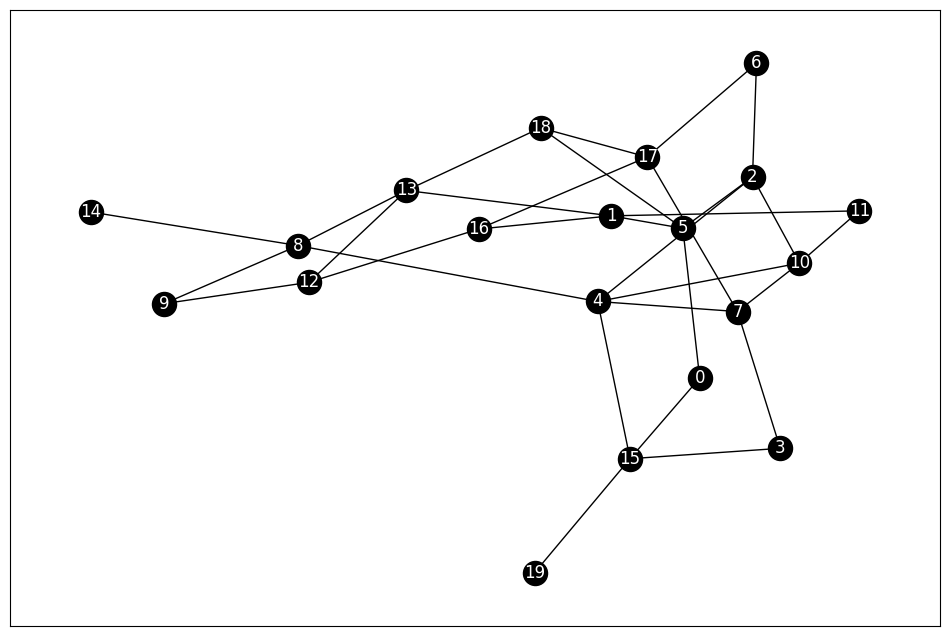

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
NUM = len(df_links.index)
for i in range(0,NUM):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        if df_links.iloc[i][j]==1:
            G.add_edge(str(i),str(j))
        
# 描画 
plt.figure(figsize=(12, 8))
nx.draw_networkx(G,node_color="k", edge_color="k", font_color="w")
plt.show()

## 7-8 人間関係のネットワークの成長の様子を可視化してみよう

### リンクデータ読み込み

In [ ]:
import pandas as pd
df_links = pd.read_csv("links.csv",index_col=0)

### ノード追加

In [ ]:
import numpy as np
N_plus = 100
N = len(df_links.index)
for i in range(N,N+N_plus):
    # 接続するノードを決定
    j = int(np.random.rand()*(i-1))
    node_name_i = "Node" + str(i)
    node_name_j = "Node" + str(j)
    # 列を追加
    df_links[node_name_i]=0
    # 行を追加
    list_zero = [[0]*(len(df_links.index)+1)]
    s = pd.DataFrame(list_zero,columns=df_links.columns.values.tolist(),index=[node_name_i])
    df_links = pd.concat([df_links, s])
    # リンクを追加
    df_links.loc[node_name_i,node_name_j] = 1
    df_links.loc[node_name_j,node_name_i] = 1
#df_links

### グラフ描画

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
NUM = len(df_links.index)
for i in range(0,NUM):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        if df_links.iloc[i][j]==1:
            G.add_edge(str(i),str(j))
        
# 描画 
plt.figure(figsize=(12, 8))
nx.draw_networkx(G,node_color="k", edge_color="k", font_color="w")
plt.show()

## 7-9 ネットワークを分析してみよう

### ノード毎のリンク数を描画

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# リンク数をカウント
list_nodenum = np.zeros(len(df_links.index))
for i in range(len(df_links.index)):
    node_name_i = "Node" + str(i)
    list_nodenum[i] = sum(df_links[node_name_i].values)
plt.bar(range(len(df_links.index)),list_nodenum)
plt.show()

### ヒストグラムを描画

In [ ]:
plt.hist(list_nodenum)
plt.show()

## 7-10. 微分方程式を差分化する際の誤差とその対策について知っておこう

### オイラー法による離散化

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
dt = 0.1
a = 1.0
T = 10
num = int(T/dt)

# 初期化（初期値設定）
n = np.zeros(num)
t = np.zeros(num)
n[0] = 2.0
t[0] = 0.0

# 時間発展方程式
for i in range(1,num):
    t[i] = t[i-1] + dt
    delta = a*n[i-1]
    n[i] = delta*dt + n[i-1]
    
# グラフ描画
plt.plot(t,n,color="blue")
plt.show()

### 解析解との比較

In [ ]:
t = np.arange(0,T,dt)
n_cont = n[0]*np.exp(a*t)
print(len(n_cont),len(n))
plt.plot(t,n)
plt.plot(t,n_cont,color="red")
plt.show()

### ルンゲ・クッタ法による解

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
dt = 0.1
a = 1.0
T = 10
num = int(T/dt)

# 初期化（初期値設定）
n_runge_kutta = np.zeros(num)
t = np.zeros(num)
n_runge_kutta[0] = 2.0
t[0] = 0.0

# 時間発展方程式を定める関数
def f(n,t):
    return n

# 時間発展方程式
for i in range(1,num):
    t[i] = t[i-1] + dt
    #delta = a*n[i-1]
    #n[i] = delta*dt + n[i-1]
    k1 = dt*f(n_runge_kutta[i-1],t[i-1])
    k2 = dt*f(n_runge_kutta[i-1]+k1/2,t[i-1]+dt/2)
    k3 = dt*f(n_runge_kutta[i-1]+k2/2,t[i-1]+dt/2)
    k4 = dt*f(n_runge_kutta[i-1]+k3,t[i-1]+dt)
    n_runge_kutta[i] = n_runge_kutta[i-1] + 1/6*(k1+2*k2+2*k3+k4)
    
# グラフ描画
plt.plot(t,n_runge_kutta,color="green")
plt.show()

### オイラー法、ルンゲクッタ法、解析解の比較

In [ ]:
t = np.arange(0,T,dt)
n_cont = n[0]*np.exp(a*t)
print(len(n_cont),len(n))
plt.plot(t,n, linewidth=4,color="blue")
plt.plot(t,n_cont, linewidth=4,color="red")
plt.plot(t,n_runge_kutta, linewidth=4, linestyle="dashed",color="green")
plt.show()